In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tweepy
from config import *

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
# Define function to obtain tweets

def tweeter(handle):

    all_tweets = []
    
    for x in range(5):
        public_tweets = api.user_timeline(handle, page=x)
        all_tweets.append(public_tweets)
        tweet_list = [item for sublist in all_tweets for item in sublist]
    return tweet_list;

In [4]:
# Define function to analyze tweets

def vader(tweet):
    
    target_string = tweet['text']
    compound_score = analyzer.polarity_scores(target_string)['compound']
    return compound_score;

In [5]:
#Check rate limit status

status = api.rate_limit_status()
print(status['resources']['statuses']['/statuses/user_timeline']['remaining'])

900


In [7]:
# WORKING Analyze tweets
targets = ['@nytimes','@CNN','@FoxNews','@CBSNews','@BBCNorthAmerica']

news_scores = {}

for name in targets:
    tweet_sentiment = []
    for item in tweeter(name):
        tweet = {}

        tweet['time'] = item['created_at']
        tweet['score'] = vader(item)
        tweet_sentiment.append(tweet)
    news_scores[name] = tweet_sentiment

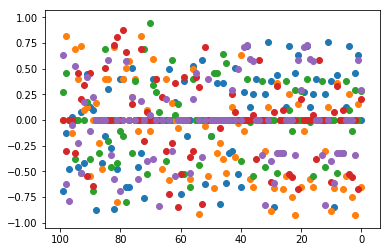

In [25]:
# WORKING

#news_scores['@BBCNorthAmerica'][1]['score']

for key, value in news_scores.items():
    score_list = []
    time_list = []
    for x in range(len(value)):
        score_list.append(news_scores[key][x]['score'])
        time_list.append(x)
    plt.scatter(time_list, score_list)
    plt.gca().invert_xaxis()
plt.show()

In [103]:
# NEW Analyze tweets
targets = ['@nytimes','@CNN','@FoxNews','@CBSNews','@BBCNorthAmerica']

news_scores = []

for name in targets:
    tweet_sentiment = {}
    counter = 1

    for item in tweeter(name):
        tweet = {}
        
        tweet['time'] = item['created_at']
        tweet['score'] = vader(item)
        tweet_sentiment[counter] = tweet
        counter = counter + 1
    news_scores.append(tweet_sentiment)

In [112]:
#TRY THIS
for value in news_scores:
    for key, item in value.items():
        test = item['time']
        print(test)

Mon Nov 27 08:22:01 +0000 2017
Mon Nov 27 08:07:06 +0000 2017
Mon Nov 27 07:52:02 +0000 2017
Mon Nov 27 07:47:06 +0000 2017
Mon Nov 27 07:32:05 +0000 2017
Mon Nov 27 07:08:04 +0000 2017
Mon Nov 27 06:53:08 +0000 2017
Mon Nov 27 06:37:04 +0000 2017
Mon Nov 27 06:22:24 +0000 2017
Mon Nov 27 06:09:45 +0000 2017
Mon Nov 27 05:50:34 +0000 2017
Mon Nov 27 05:32:34 +0000 2017
Mon Nov 27 05:17:39 +0000 2017
Mon Nov 27 05:00:20 +0000 2017
Mon Nov 27 04:32:11 +0000 2017
Mon Nov 27 04:13:11 +0000 2017
Mon Nov 27 03:58:56 +0000 2017
Mon Nov 27 03:44:43 +0000 2017
Mon Nov 27 03:28:10 +0000 2017
Mon Nov 27 03:08:08 +0000 2017
Mon Nov 27 08:22:01 +0000 2017
Mon Nov 27 08:07:06 +0000 2017
Mon Nov 27 07:52:02 +0000 2017
Mon Nov 27 07:47:06 +0000 2017
Mon Nov 27 07:32:05 +0000 2017
Mon Nov 27 07:08:04 +0000 2017
Mon Nov 27 06:53:08 +0000 2017
Mon Nov 27 06:37:04 +0000 2017
Mon Nov 27 06:22:24 +0000 2017
Mon Nov 27 06:09:45 +0000 2017
Mon Nov 27 05:50:34 +0000 2017
Mon Nov 27 05:32:34 +0000 2017
Mon Nov 

In [96]:
for key, value in news_scores.items():
    #print(value)
    for items in value:
        score_list = []
        for value in items:
            #score_list.append(item['score'])
            print(value)
        #print(items)
        #print(score_list)
#score_list

#news_scores['@CNN'][0]['score']



TypeError: string indices must be integers

In [69]:
news_scores['@nytimes'][0].items()

dict_items([('time', 'Mon Nov 27 07:08:04 +0000 2017'), ('score', -0.4588)])

In [79]:
len(news_scores)

3

In [82]:
news_scores['@CNN']

[{'score': 0.2263, 'time': 'Mon Nov 27 07:17:20 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 07:10:07 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 07:00:12 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 06:52:43 +0000 2017'},
 {'score': 0.128, 'time': 'Mon Nov 27 06:45:11 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 06:37:26 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 06:30:12 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 06:18:57 +0000 2017'},
 {'score': -0.4939, 'time': 'Mon Nov 27 06:08:53 +0000 2017'},
 {'score': -0.34, 'time': 'Mon Nov 27 06:00:15 +0000 2017'},
 {'score': -0.9153, 'time': 'Mon Nov 27 06:00:03 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 05:47:51 +0000 2017'},
 {'score': -0.25, 'time': 'Mon Nov 27 05:40:33 +0000 2017'},
 {'score': -0.6369, 'time': 'Mon Nov 27 05:31:14 +0000 2017'},
 {'score': 0.0, 'time': 'Mon Nov 27 05:10:05 +0000 2017'},
 {'score': 0.1134, 'time': 'Mon Nov 27 05:00:25 +0000 2017'},
 {'score': -0.2732, 'time': 'Mon